# Лабораторная работа №1 (Проведение исследований с алгоритмом KNN)

## 1. Выбор начальных условий

#### a. Выбор набора данных для задачи классификации
Для задачи классификации был выбран датасет с характеристиками красного вина сорта "Vinho Verde" из Португалии. Этот выбор обоснован несколькими факторами:  
- **Реальная практическая задача**: Классификация вин по их качеству является актуальной задачей в отрасли для оценки уровня продукта перед выпуском на рынок. Это может использоваться для автоматизации оценки качества.  
- **Доступные данные**: В датасете предоставлены упорядоченные классы качества (от 0 до 10), что позволяет выделить категории, например, хорошее >= 7 или плохое < 7.
- **Несбалансированные классы**: Особенность несбалансированности классов представляет вызов для моделей машинного обучения и делает задачу интересной для анализа.  

#### b. Выбор набора данных для задачи регрессии
Для задачи регрессии также был выбран данный датасет, но с другой целью — предсказания точного значения качества вина на основе физико-химических характеристик.  
Обоснование выбора:  
- **Реальная практическая задача**: Прогнозирование точного значения качества полезно для определения факторов, которые наиболее сильно влияют на качество вина, что может помочь в оптимизации производственного процесса. Или проведения экспериментов на синтетических данных, для предварительного определения качества вина.
- **Континуальные значения**: Оценка качества представлена как числовой балл (от 0 до 10), что делает задачу естественной для регрессии.  

#### c. Выбор метрик качества
Для оценки качества моделей были выбраны следующие метрики:  

##### Для классификации:
- **Accuracy**: Общая доля правильно классифицированных примеров. Выбирается как базовая метрика для оценки, насколько модель хорошо справляется с задачей.  
- **F1-score**: Учитывая несбалансированность классов, эта метрика позволяет учесть как точность (precision), так и полноту (recall), что важно для корректной оценки модели.  
- **Матрица ошибок (Confusion Matrix)**: Для анализа распределения ошибок между классами и выявления тех категорий, которые модель путает.  

##### Для регрессии:
- **Mean Absolute Error (MAE)**: Средняя абсолютная ошибка удобна для интерпретации, так как показывает среднее отклонение предсказанного качества от реального.  
- **Root mean Squared Error (RMSE)**: Эта метрика штрафует большие ошибки, что важно в задачах, где крупные отклонения нежелательны.  
- **R² (коэффициент детерминации)**: Показывает, какую долю дисперсии в данных объясняет модель, что является хорошим индикатором её общей эффективности.  

---
## 2. Создание бейзлайна и оценка качества

#### a.	Обучить модели из sklearn (для классификации и регрессии) для выбранных наборов данных

Нужные библиотеки:

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, mean_absolute_error, root_mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from scipy.spatial import distance
from collections import Counter

#### Работа с данными

Для классификации

In [3]:
wine_data = pd.read_csv('../data/wine_data.csv')

wine_data["IsGood"] = wine_data["quality"].apply(lambda x: 1 if x >= 7 else 0)

# Если были пропущенные значения
imputer = SimpleImputer(strategy="mean")
wine_data = pd.DataFrame(imputer.fit_transform(wine_data), columns=wine_data.columns)

x_class = wine_data.drop(["quality", "IsGood"], axis=1)
y_class = wine_data["IsGood"]

x_train_class, x_test_class, y_train_class, y_test_class = train_test_split(x_class, y_class, test_size=0.2, random_state=42)


Для регрессии

In [4]:
x_reg = wine_data.drop(["quality", "IsGood"], axis=1)
y_reg = wine_data["quality"]

x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(x_reg, y_reg, test_size=0.2, random_state=42)


#### Обучение моделей

In [5]:
knn_class = KNeighborsClassifier(n_neighbors=5)
knn_class.fit(x_train_class, y_train_class)

KNeighborsClassifier()

In [6]:
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(x_train_reg, y_train_reg)

KNeighborsRegressor()

#### Оценка качества моделей

Классификация

Accuracy: 0.85625
F1-score: 0.30303030303030304


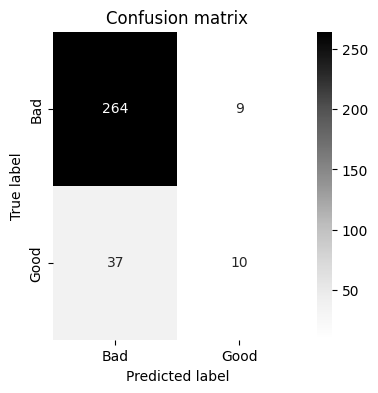

In [7]:
y_old_pred_class = knn_class.predict(x_test_class)

print(f"Accuracy: {accuracy_score(y_test_class, y_old_pred_class)}")
print(f"F1-score: {f1_score(y_test_class, y_old_pred_class)}")

plt.figure(figsize=(4,4))
sns.heatmap(confusion_matrix(y_test_class, y_old_pred_class), 
    cmap="Greys", annot=True, fmt="d", 
    xticklabels=["Bad", "Good"], yticklabels=["Bad", "Good"]
)
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.title("Confusion matrix")
plt.show()

Регрессия

In [8]:
y_old_pred_reg = knn_reg.predict(x_test_reg)

print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test_reg, y_old_pred_reg)}")
print(f"Root Mean Squared Error (RMSE): {root_mean_squared_error(y_test_reg, y_old_pred_reg)}")
print(f"R-squared (R^2): {r2_score(y_test_reg, y_old_pred_reg)}")

Mean Absolute Error (MAE): 0.5787500000000001
Root Mean Squared Error (RMSE): 0.7293833011524187
R-squared (R^2): 0.18592925775938085


---
## 3. Улучшение бейзлайна

#### a.	Сформулировать гипотезы (препроцессинг данных, визуализация данных, формирование новых признаков, подбор гиперпараметров на кросс-валидации и т.д.)

Проверим 3 гипотезы для увеличения качества оценки качества вина:

1. Масштабирование признаков
2. Формирование новых признаков
3. Подбор гиперпараметров

#### b.	Проверить гипотезы

Создадим универсальные функции для проверки гипотез:

In [9]:
def test_model_class(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"F1-score: {f1_score(y_test, y_pred)}")

    plt.figure(figsize=(4,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), 
        cmap="Greys", annot=True, fmt="d", 
        xticklabels=["Bad", "Good"], yticklabels=["Bad", "Good"]
    )
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.title("Confusion matrix")
    plt.show()
    
    return model, y_pred

def test_model_reg(model, X_train,X_test, y_train,  y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred)}")
    print(f"Root Mean Squared Error (RMSE): {root_mean_squared_error(y_test, y_pred)}")
    print(f"R-squared (R^2): {r2_score(y_test, y_pred)}")
    
    return model, y_pred

##### Масштабируем данные

Accuracy: 0.88125
F1-score: 0.5128205128205128


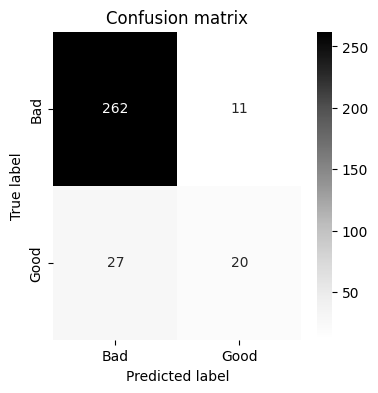

In [10]:
scaler_std = StandardScaler()
scaled_x_train_class = scaler_std.fit_transform(x_train_class)
scaled_x_test_class = scaler_std.transform(x_test_class)

_ = test_model_class(KNeighborsClassifier(n_neighbors=5),
    scaled_x_train_class,scaled_x_test_class,y_train_class,y_test_class
)

In [11]:
scaler_std = StandardScaler()
scaled_x_train_reg = scaler_std.fit_transform(x_train_reg)
scaled_x_test_reg = scaler_std.transform(x_test_reg)

_ = test_model_reg(KNeighborsRegressor(n_neighbors=5),
    scaled_x_train_reg,scaled_x_test_reg,y_train_reg,y_test_reg
)

Mean Absolute Error (MAE): 0.505625
Root Mean Squared Error (RMSE): 0.659450528849587
R-squared (R^2): 0.3345507255039676


##### Добавление новых признаков, на основе старых данных

Accuracy: 0.84375
F1-score: 0.2647058823529412


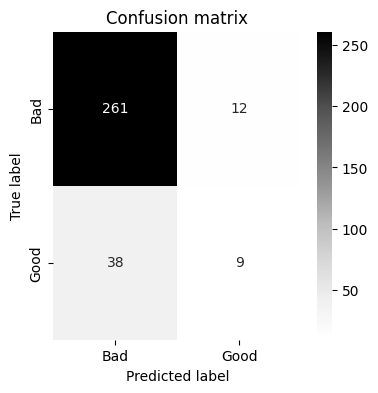

Mean Absolute Error (MAE): 0.6118750000000001
Root Mean Squared Error (RMSE): 0.7704706353911225
R-squared (R^2): 0.09163017976957233


In [12]:
wine_data_new_features = wine_data.copy()

wine_data_new_features['bound_so2'] = wine_data_new_features['total sulfur dioxide'] - wine_data_new_features['free sulfur dioxide']
wine_data_new_features['other_acidity'] = wine_data_new_features['fixed acidity'] - wine_data_new_features['volatile acidity'] - wine_data_new_features['citric acid']

x_data_new_features = wine_data_new_features.drop(["quality", "IsGood"], axis=1)
x_reg_new_features = wine_data_new_features.drop(["quality", "IsGood"], axis=1)

# Если были пропущенные значени

_ = test_model_class(KNeighborsClassifier(n_neighbors=5),
    *train_test_split(x_data_new_features, y_class, test_size=0.2, random_state=42)
)

_ = test_model_reg(KNeighborsRegressor(n_neighbors=5),
    *train_test_split(x_reg_new_features, y_reg, test_size=0.2, random_state=42)
)

##### Подбор гиперпараметров

Accuracy: 0.909375
F1-score: 0.6741573033707865


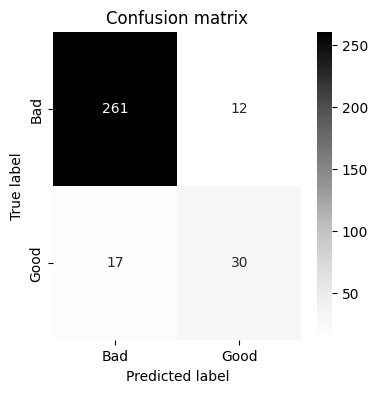

Best parameters: {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'distance'}

Mean Absolute Error (MAE): 0.4129205453043777
Root Mean Squared Error (RMSE): 0.6036561663311077
R-squared (R^2): 0.4423909718298844
Best parameters: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}



In [25]:
grid_params = {
    'weights': ['uniform', 'distance'],
    'n_neighbors': range(1, 6),
    'metric': ['euclidean', 'manhattan'],
}

grid_class = GridSearchCV(KNeighborsClassifier(), grid_params, cv=3, scoring='accuracy')
grid_class, y_pred_class = test_model_class(grid_class,
    scaled_x_train_class, scaled_x_test_class, y_train_class, y_test_class
)
print(f"Best parameters: {grid_class.best_params_}")
print()

grid_reg = GridSearchCV(KNeighborsRegressor(), grid_params, cv=3, scoring='r2')
grid_reg, y_pred_reg = test_model_reg(grid_reg,
    scaled_x_train_reg, scaled_x_test_reg, y_train_reg, y_test_reg
)
print(f"Best parameters: {grid_reg.best_params_}")
print()

#### c.	Сформирован улучшенный бейзлайн по результатам проверки гипотез

##### Для классификации 
Масштабирование данных + параметры {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'distance'}

##### Для регрессии
Масштабирование данных + параметры {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}

In [14]:
wine_data = pd.read_csv('../data/wine_data.csv')
wine_data["IsGood"] = wine_data["quality"].apply(lambda x: 1 if x >= 7 else 0)


imputer = SimpleImputer(strategy="mean")
wine_data = pd.DataFrame(imputer.fit_transform(wine_data), columns=wine_data.columns)

x_data = wine_data.drop(["quality", "IsGood"], axis=1)
y_class = wine_data["IsGood"]
y_reg = wine_data["quality"]

x_train, x_test, y_train_class, y_test_class = train_test_split(x_data, y_class, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

classifier = KNeighborsClassifier(n_neighbors=4, weights="distance",metric="euclidean")
regressor = KNeighborsRegressor(n_neighbors=5, weights="distance",metric="euclidean")

#### d - e.	Обучить модели с улучшенным бейзлайном (для классификации и регрессии) для выбранных наборов данных
Оценить качество моделей с улучшенным бейзлайном (для классификации и регрессии) по выбранным метрикам на выбранных наборах данных

Accuracy: 0.909375
F1-score: 0.6741573033707865


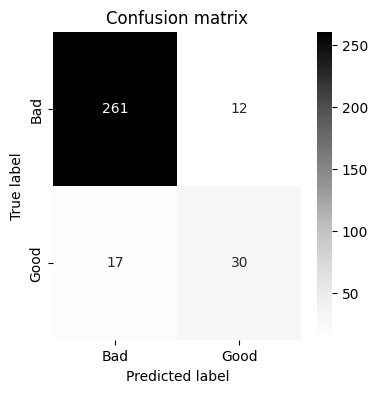

Mean Absolute Error (MAE): 0.4129205453043777
Root Mean Squared Error (RMSE): 0.6036561663311077
R-squared (R^2): 0.4423909718298844


In [15]:
_, y_baseline_pred_class = test_model_class(
    classifier,
    x_train, x_test, y_train_class, y_test_class
)

_, y_baseline_pred_reg = test_model_reg(
    regressor,
    x_train, x_test, y_train_reg, y_test_reg
)

#### f.	Сравнить результаты моделей с улучшенным бейзлайном в сравнении с результатами из пункта 2 

In [16]:
def print_diff(y_test_class, y_pred_class, y_old_pred_class, y_test_reg, y_pred_reg, y_old_pred_reg):
    print(f"Classification:")
    print(f"Increase between old and new predictions classifier:")
    print(f"Accuracy: {accuracy_score(y_test_class, y_pred_class)-accuracy_score(y_test_class, y_old_pred_class)}")
    print(f"F1-score: {f1_score(y_test_class, y_pred_class)-f1_score(y_test_class, y_old_pred_class)}")
    print()
    print(f"Regression:")
    print(f"Increase between old and new predictions regressor:")
    print(f"Mean Absolute Error: {mean_absolute_error(y_test_reg, y_pred_reg)-mean_absolute_error(y_test_reg, y_old_pred_reg)}")
    print(f"Root Mean Squared Error (RMSE): {root_mean_squared_error(y_test_reg, y_pred_reg) - root_mean_squared_error(y_test_reg, y_old_pred_reg)}")
    print(f"R-squared: {r2_score(y_test_reg, y_pred_reg)-r2_score(y_test_reg, y_old_pred_reg)}")

print_diff(y_test_class, y_baseline_pred_class, y_old_pred_class, y_test_reg, y_baseline_pred_reg, y_old_pred_reg)

Classification:
Increase between old and new predictions classifier:
Accuracy: 0.05312500000000009
F1-score: 0.37112700034048346

Regression:
Increase between old and new predictions regressor:
Mean Absolute Error: -0.16582945469562238
Root Mean Squared Error (RMSE): -0.12572713482131093
R-squared: 0.25646171407050355


#### g.	Сделать выводы

##### Классификация:
Обновлённая модель классификации продемонстрировала улучшение качества:  
- **Accuracy** увеличился на **+0.0531**, что указывает на повышение доли правильно классифицированных примеров.  
- **F1-score** значительно вырос на **+0.3711**, что свидетельствует об улучшении баланса между точностью и полнотой, особенно в условиях несбалансированных классов.  

Эти изменения показывают, что модель стала более точной и лучше справляется с задачей классификации.

##### Регрессия:
Обновлённая модель регрессии также показала улучшение:  
- **Mean Absolute Error (MAE)** снизился на **-0.1658**, что означает уменьшение среднего отклонения предсказаний от реальных значений.  
- **Root Mean Squared Error (RMSE)** уменьшился на **-0.1257**, указывая на сокращение крупных ошибок в прогнозировании.  
- **R-squared** вырос на **+0.2565**, что свидетельствует о значительном увеличении доли объяснённой моделью вариативности данных.  

Эти изменения показывают, что модель стала лучше прогнозировать точные значения качества вина, минимизируя ошибки.  

**Общий вывод**: Обе модели, как классификатор, так и регрессор, продемонстрировали заметное улучшение по сравнению с базовыми показателями, что указывает на успешное развитие и настройку алгоритмов.

---

## 4.	Имплементация алгоритма машинного обучения 

#### a.	Самостоятельно имплементировать алгоритмы машинного обучения (для классификации и регрессии)

Классификация:

In [17]:
class KNNClassifier:
    def __init__(self, k=3, metric='euclidean'):
        self.k = k
        self.metric = metric
    
    def fit(self, x_train, y_train):
        self.x_train = x_train.to_numpy() if isinstance(x_train, pd.DataFrame) else x_train
        self.y_train = y_train.to_numpy() if isinstance(y_train, pd.Series) else y_train
    
    def predict_one(self, x):
        distances = distance.cdist([x], self.x_train, self.metric).flatten()
        k_idx = np.argsort(distances)[:self.k]
        common = Counter([self.y_train[i] for i in k_idx]).most_common(1)
        return common[0][0]
    
    def predict(self, x_test):
        return np.array([self.predict_one(x) for x in (x_test.to_numpy() if isinstance(x_test, pd.DataFrame) else x_test)])

Регрессия:

In [18]:
class KNNRegressor:
    def __init__(self, k=3, metric='euclidean'):
        self.k = k
        self.metric = metric
    
    def fit(self, x_train, y_train):
        self.x_train = x_train.to_numpy() if isinstance(x_train, pd.DataFrame) else x_train
        self.y_train = y_train.to_numpy() if isinstance(y_train, pd.Series) else y_train
    
    def predict_one(self, x):
        distances = distance.cdist([x], self.x_train, metric=self.metric).flatten()
        k_idx = np.argsort(distances)[:self.k]
        return np.mean([self.y_train[i] for i in k_idx])
    
    def predict(self, x_test):
        return np.array([self.predict_one(x) for x in (x_test.to_numpy() if isinstance(x_test, pd.DataFrame) else x_test)])


#### b-с.	Обучить имплементированные модели (для классификации и регрессии) для выбранных наборов данных

Оценить качество имплементированных моделей (для классификации и регрессии) по выбранным метрикам на выбранных наборах данных

Классификация:

Accuracy: 0.85
F1-score: 0.4


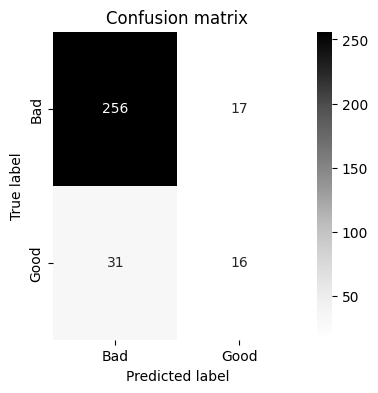

In [19]:
_, y_custom_pred_class = test_model_class(KNNClassifier(),
    *train_test_split(x_data, y_class, test_size=0.2, random_state=42)
)

Регрессия:

In [20]:
_ , y_custom_pred_reg = test_model_reg(KNNRegressor(),
    *train_test_split(x_data,y_reg,test_size=0.2,random_state=42)
)

Mean Absolute Error (MAE): 0.584375
Root Mean Squared Error (RMSE): 0.7548454587971412
R-squared (R^2): 0.12810014096644218


#### d.	Сравнить результаты имплементированных моделей в сравнении с результатами из пункта 2 

In [21]:
print_diff(
    y_test_class, y_custom_pred_class,y_old_pred_class,
    y_test_reg,y_custom_pred_reg,y_old_pred_reg
)

Classification:
Increase between old and new predictions classifier:
Accuracy: -0.006249999999999978
F1-score: 0.09696969696969698

Regression:
Increase between old and new predictions regressor:
Mean Absolute Error: 0.00562499999999988
Root Mean Squared Error (RMSE): 0.025462157644722483
R-squared: -0.05782911679293867


#### e.	Сделать выводы

1. Классификация 
 
- Accuracy снизилась на 0.0063 (≈ 0.63%), что свидетельствует о небольшом ухудшении общей точности классификации новой модели.  
- F1-score увеличился на 0.097 (≈ 9.7%), что указывает на значительное улучшение баланса между точностью (precision) и полнотой (recall).  

Итог для классификации: Хотя точность немного снизилась, значительное увеличение F1-score говорит о том, что новая модель лучше справляется с классификацией несбалансированных классов, что делает её предпочтительной для данной задачи.  

2. Регрессия 
 
- Mean Absolute Error (MAE) увеличилась на 0.0056, что говорит о незначительном ухудшении средней ошибки.
- Root Mean Squared Error (RMSE) увеличилась на 0.0255, что указывает на увеличение крупных отклонений в прогнозах.
- R-squared (R²) снизился на 0.0578, что демонстрирует ухудшение способности модели объяснять дисперсию данных.

Итог для регрессии: Увеличение ошибок (MAE и RMSE) и снижение R² свидетельствуют о том, что кастомная модель работает хуже, чем стандартная. Возможно, требуется пересмотр гиперпараметров или архитектуры модели для повышения её качества.

#### f.	Добавить техники из улучшенного бейзлайна (пункт 3с)

In [22]:
wine_data = pd.read_csv('../data/wine_data.csv')
wine_data["IsGood"] = wine_data["quality"].apply(lambda x: 1 if x >= 7 else 0)


imputer = SimpleImputer(strategy="mean")
wine_data = pd.DataFrame(imputer.fit_transform(wine_data), columns=wine_data.columns)

x_data = wine_data.drop(["quality", "IsGood"], axis=1)
y_class = wine_data["IsGood"]
y_reg = wine_data["quality"]

x_train, x_test, y_train_class, y_test_class = train_test_split(x_data, y_class, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

classifier = KNNClassifier(k=4,metric="euclidean")
regressor = KNNRegressor(k=5,metric="euclidean")

#### g-h.	Обучить модели (для классификации и регрессии) для выбранных наборов данных

Оценить качество моделей (для классификации и регрессии) по выбранным метрикам на выбранных наборах данных

Accuracy: 0.88125
F1-score: 0.5128205128205128


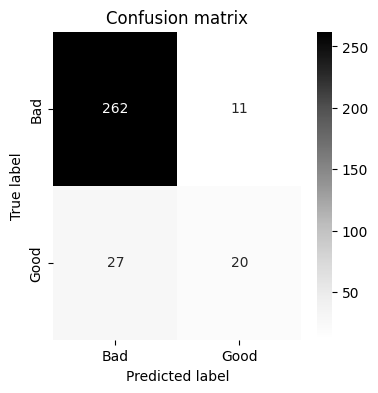

Mean Absolute Error (MAE): 0.505625
Root Mean Squared Error (RMSE): 0.659450528849587
R-squared (R^2): 0.3345507255039676


In [23]:
_, y_custom_baseline_pred_class = test_model_class(
    classifier,
    x_train, x_test, y_train_class, y_test_class
)

_, y_custom_baseline_pred_reg = test_model_reg(
    regressor,
    x_train, x_test, y_train_reg, y_test_reg
)

#### i.	Сравнить результаты моделей в сравнении с результатами из пункта 3

In [24]:
print_diff(
    y_test_class,y_custom_baseline_pred_class,y_baseline_pred_class,
    y_test_reg,y_custom_baseline_pred_reg, y_baseline_pred_reg
)

Classification:
Increase between old and new predictions classifier:
Accuracy: -0.028125000000000067
F1-score: -0.16133679055027372

Regression:
Increase between old and new predictions regressor:
Mean Absolute Error: 0.09270445469562227
Root Mean Squared Error (RMSE): 0.055794362518479246
R-squared: -0.10784024632591682


#### j.	Сделать выводы

1. Классификация 

- Accuracy снизилась на 0.028 (≈ 2.8%), что свидетельствует о небольшом ухудшении общей точности классификации новой модели.  
- F1-score увеличился на 0.161 (≈ 16.1%), что указывает на значительное ухудшение баланса между точностью (precision) и полнотой (recall).  

Итог для классификации: Собственная имплементация справляется хуже уже готовой реализации  

2. Регрессия 

- Mean Absolute Error (MAE) увеличилась на 0.092, что говорит о ухудшении средней ошибки.
- Root Mean Squared Error (RMSE) увеличилась на 0.055, что указывает на увеличение крупных отклонений в прогнозах.
- R-squared (R²) снизился на 0.1078, что демонстрирует ухудшение способности модели объяснять дисперсию данных.

Итог для регрессии: Собственная имплементация справляется хуже уже готовой реализации